In [72]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [73]:
#[ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#[ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [86]:
### length -> 합치기(bream_length,smelt_length)
### weight -> 합치기(bream_weight,smelt_weight)

length = bream_length+smelt_length
weight = bream_weight+smelt_weight
result = [1]*35+[0]*14

### datas = length, weight 합치기
datas = []
for i in range(len(length)) :
    datas.append([length[i],weight[i],result[i]])
datas

# zip() : 반복해서 각각 list 데이터를 1개씩 뽑아서 전달해줌
datas = [[l,w] for l,w in zip(length,weight)]
datas

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [87]:
df_train = pd.DataFrame(train_input)
df_train.head(1)
df_test = pd.DataFrame(test_input)
df_test.head(1)

,0,1
0,35.0,700.0


In [75]:
# random 함수를 사용해서
# 49개중 35개 데이터는 train_input,train_target / 14개는 test_input,test_target
# 출력하시오
idx = [i for i in range(49)]
random.shuffle(idx)


train_input = [datas[i] for i in idx[:35]]
train_target = [result[i] for i in idx[:35]]
test_input = [datas[i] for i in idx[35:]]
test_target = [result[i] for i in idx[35:]]


In [76]:
len(bream_length) # 도미데이터 - 35
len(smelt_length) # 빙어데이터 - 14

14

In [77]:
# 데이터의 전처리 과정을 해보세요
# train_input,test_input,train_target,test_target

In [78]:
clf

KNeighborsClassifier()

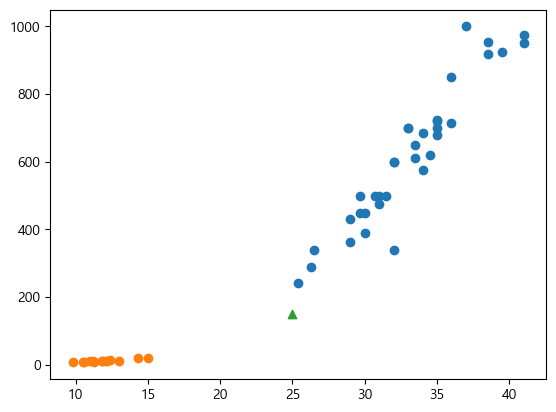

In [79]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(25,150,marker='^')

In [80]:
# 데이터 학습
from sklearn.neighbors import KNeighborsClassifier
# clf = svm.SVC()
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)
# 데이터 예측
pre = clf.predict(test_input)
print("예측 데이터값 : ",pre)

예측 데이터값 :  [1 0 1 1 1 0 0 0 1 1 0 1 1 1]


In [81]:
# train_input 몇번째 index 데이터를 사용했는지 알려줌
distances,index = clf.kneighbors([[25,150]])

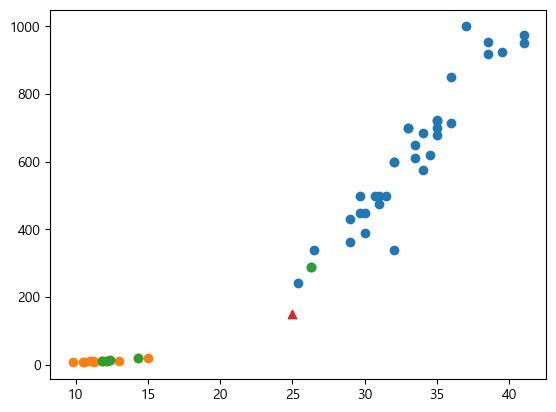

In [91]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(df_train.iloc[index[0],0],df_train.iloc[index[0],1])
plt.scatter(25,150,marker='^')

In [83]:
# 정답율
score = clf.score(test_input,test_target)
print("정답률 : ",score)

정답률 :  1.0


In [84]:
# 길이 30 ,무게600 고기 무엇인지 판단하시오
# [30,600]
pre = clf.predict([[25,150]])
print("예측 데이터값 : ",pre)

예측 데이터값 :  [0]
